# **FINAL PROJECT REPORT:** *NFL Attendance DataSet*
##### **Kelompok 6:**
*   5052241016 M. Dafy Irwansyah
*   5052241034 Alycia Zada
*   5052241038 Annisa Maulida
*   5052241039 M. Kafanal Kafi





# **A. PENDAHULUAN**
#### **#1 Deskripsi Dataset**
NFL Attendance Dataset terdiri dari tiga
dataset berbeda yang masing-masing secara berurut menjelaskan mengenai kehadiran penonton pertandingan, peringkat tim, dan jalannya pertandingan itu sendiri. Tiga dataset tersebut diantaranya "attendance.csv" merujuk pada kehadiran penonton di setiap pertandingan, "standings.csv" merujuk pada track margin kemenangan sebuah tim,  "games.csv" merujuk pada detail setiap pertandingan, menunjukkan kapan, siapa, dan hasil dari setiap pertandingan.

#### **#2 Mengapa Pilih Dataset ini?**
Kami memilih dataset ini karena beberapa alasan dan pertimbangan analisa, yaitu:

*Dari Perspektif Bisnis:*
- Kehadiran penonton berkorelasi langsung dengan pendapatan tim dari penjualan tiket, merchandise, dan konsesi
- Data ini penting untuk strategi pricing, perencanaan kapasitas stadion, dan negosiasi sponsor
- Memahami tren kehadiran membantu manajemen tim dalam membuat keputusan investasi jangka panjang

*Dari Perspektif Sosial:*
- Mencerminkan loyalitas dan engagement penggemar terhadap tim favorit
- Menunjukkan bagaimana faktor eksternal (ekonomi, pandemi, performa tim) memengaruhi perilaku konsumen olahraga
- NFL sebagai fenomena budaya Amerika memberikan insight tentang tren sosial yang lebih luas

*Dari Perspektif Analitik:*
- Dataset memiliki variabel yang beragam dan saling terkait (attendance, standings, games)
- Rentang waktu 20 tahun (2000-2019) memungkinkan analisis tren jangka panjang
- Kombinasi data kuantitatif dan kategorikal cocok untuk berbagai teknik analisis

#### **#3 Rumusan Masalah dan Tujuan Analisis**
1. Bagaimana tren kehadiran penonton NFL berubah dari tahun 2000 hingga 2019?
2. Apakah performa tim (win rate) memengaruhi jumlah kehadiran penonton secara signifikan?
3. Faktor-faktor apa saja yang paling berhubungan dengan tingkat kehadiran penonton?
4. Apakah terdapat pola musiman atau mingguan dalam kehadiran penonton?
5. Tim mana yang memiliki basis penggemar paling loyal (kehadiran konsisten terlepas dari performa)?

#### **#4 Tujuan Analisis:**
- Mengidentifikasi tren jangka panjang dalam kehadiran penonton NFL
- Memahami hubungan antara performa tim dan loyalitas penggemar
- Memberikan insight untuk optimalisasi strategi marketing dan operasional tim
- Mengungkap faktor-faktor kunci yang mendorong atau menghambat kehadiran penonton

# **B. SETUP & PACKAGE**

#### **#1 Import Packages**

In [186]:
%pip install -r "../requirements.txt"


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#### **#2 Fungsi Packages**

Kami memilih 4 packages yang berkontribusi dalam analisa kami. Pemanfaatan dari segi visualisasi menggunakan packages `matplotlib.pyplot` serta `seaborn`. Packages `pandas` untuk membaca data, cleaning data, filtering, dan manipulasi lainnya. Packages `numpy` dimanfaatkan untuk array, perhitungan, serta statistik dasar.

# **C. DATA PREPARATION**

#### **#1 Import Dataset**

In [188]:
attendance = pd.read_csv("../data/raw/attendance.csv")
standings = pd.read_csv("../data/raw/standings.csv")
games = pd.read_csv("../data/raw/games.csv")

Selanjutnya, kami membentuk 2 susunan DataFrame yang berbeda. DataFrame **`merged_df`** merupakan gabungan dari dataset attendance dan standings. Pada merge_df dilakukan sortir berdasarkan "year", "team_name" serta "team" sehingga kolom selanjutnya "week" bisa menyesuaikan secara berurutan mulai dari 1. DataFrame yang kedua yaitu **`games`** yang memuat format asli dari "games.csv".

In [189]:
merged_df = pd.merge(attendance, standings, on=["year", "team_name", "team"], how="left")

In [190]:
merged_df.head()

,team,team_name,year,total,home,away,week,weekly_attendance,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,playoffs,sb_winner
0,Arizona,Cardinals,2000,893926,387475,506451,1,77434.0,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
1,Arizona,Cardinals,2000,893926,387475,506451,2,66009.0,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
2,Arizona,Cardinals,2000,893926,387475,506451,3,NaN,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
3,Arizona,Cardinals,2000,893926,387475,506451,4,71801.0,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl
4,Arizona,Cardinals,2000,893926,387475,506451,5,66985.0,3,13,210,443,-233,-14.6,-0.7,-15.2,-7.2,-8.1,No Playoffs,No Superbowl


In [191]:
print(merged_df.shape)

(10846, 20)


In [192]:
games.head()

,year,week,home_team,away_team,winner,tie,day,date,time,pts_win,pts_loss,yds_win,turnovers_win,yds_loss,turnovers_loss,home_team_name,home_team_city,away_team_name,away_team_city
0,2000,1,Minnesota Vikings,Chicago Bears,Minnesota Vikings,NaN,Sun,September 3,1:00PM,30,27,374,1,425,1,Vikings,Minnesota,Bears,Chicago
1,2000,1,Kansas City Chiefs,Indianapolis Colts,Indianapolis Colts,NaN,Sun,September 3,1:00PM,27,14,386,2,280,1,Chiefs,Kansas City,Colts,Indianapolis
2,2000,1,Washington Redskins,Carolina Panthers,Washington Redskins,NaN,Sun,September 3,1:01PM,20,17,396,0,236,1,Redskins,Washington,Panthers,Carolina
3,2000,1,Atlanta Falcons,San Francisco 49ers,Atlanta Falcons,NaN,Sun,September 3,1:02PM,36,28,359,1,339,1,Falcons,Atlanta,49ers,San Francisco
4,2000,1,Pittsburgh Steelers,Baltimore Ravens,Baltimore Ravens,NaN,Sun,September 3,1:02PM,16,0,336,0,223,1,Steelers,Pittsburgh,Ravens,Baltimore


In [193]:
print(games.shape)

(5324, 19)


#### **#2 Cleaning and Data Wrangling**

##### **2.1 Cek Missing Values**

###### *SubTask*:
Mengidentikasi, menjumlahkan, mendapatkan persentase, serta visualisasi distribusi missing value.

Untuk mengidentifikasi missing value, kami menghitung dan mendapatkan persentase missing value dari setiap kolom terlebih dahulu pada DataFrame **`games`**. Cara ini dapat mempermudah kami untuk memahami dan mengolah missing values pada DataFrame.

In [194]:
missing_values_games = games.isnull().sum()
missing_percentage_games = (games.isnull().sum() / len(games)) * 100

missing_df_games = pd.DataFrame({
    'Missing Count': missing_values_games,
    'Missing Percentage': missing_percentage_games
})

missing_df_games = missing_df_games[missing_df_games['Missing Count'] > 0].sort_values(
    by='Missing Percentage',
    ascending=False
)

print("Kolom dengan Missing Values:")
print(missing_df_games)

Kolom dengan Missing Values:
     Missing Count  Missing Percentage
tie           5314           99.812171



Setelah mendapatkan jumlah total dan persentase missing values, selanjutnya kami lakukan visualisasi dalam bentuk bar plot.




In [195]:
nfl_palette = [
    "#0B2265",  # Deep Navy (Patriots, Bears, Cowboys)
    "#D50A0A",  # NFL Red (Chiefs, Bucs)
    "#AA8A00",  # Metallic Gold (49ers, Saints)
    "#004C54",  # Dark Green (Packers, Eagles)
    "#A5ACAF",  # Silver/Grey (Raiders, Lions)
    "#000000",  # Black (Steelers, Raiders)
    "#FFFFFF"   # White (common accent)
]

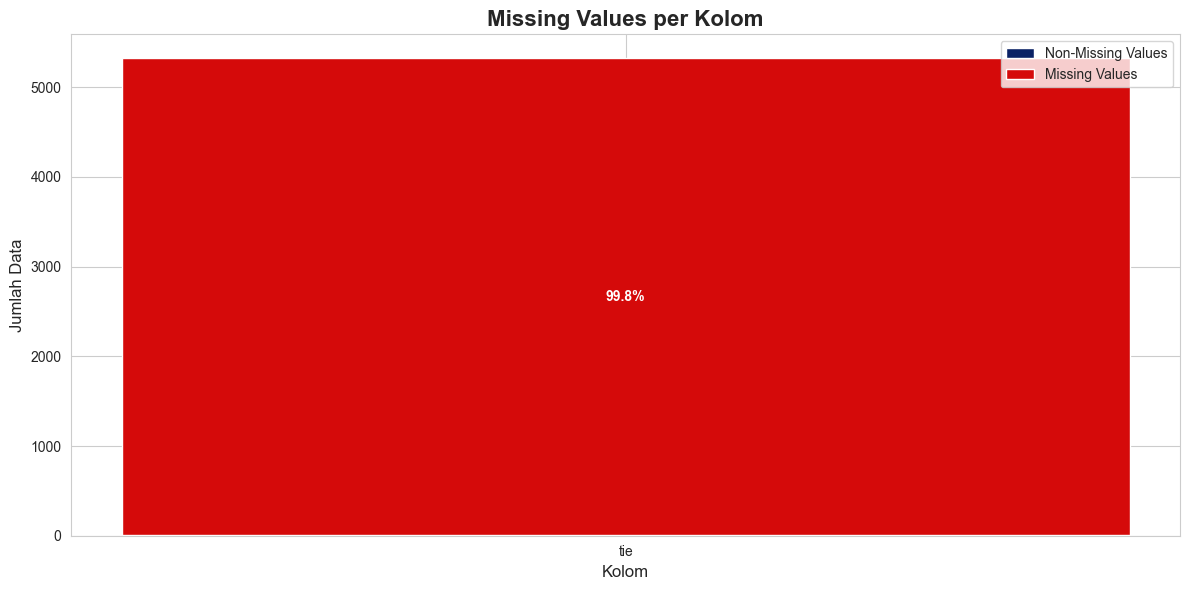

In [196]:
# Visualisasi Perbandingan Missing Values dan Non-Missing Values
missing_df_games['Non Missing Count'] = len(games) - missing_df_games['Missing Count']

plt.figure(figsize=(12, 6))

plt.bar(
    missing_df_games.index,
    missing_df_games['Non Missing Count'],
    label='Non-Missing Values',
    color=nfl_palette
)

plt.bar(
    missing_df_games.index,
    missing_df_games['Missing Count'],
    bottom=missing_df_games['Non Missing Count'],
    label='Missing Values',
    color='#D50A0A'
)

plt.title('Missing Values per Kolom', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Data', fontsize=12)
plt.xlabel('Kolom', fontsize=12)

for i, (col, row) in enumerate(missing_df_games.iterrows()):
    plt.text(
        i,
        row['Non Missing Count'] + row['Missing Count'] * 0.5,
        f"{row['Missing Percentage']:.1f}%",
        ha='center',
        va='center',
        color='white',
        fontweight='bold'
    )

plt.legend()
plt.tight_layout()
plt.show()

Untuk mengidentifikasi missing value, kami menghitung dan mendapatkan persentase missing value dari setiap kolom terlebih dahulu pada DataFrame **`merged_df`**. Cara ini dapat mempermudah kami untuk memahami dan mengolah missing values pada DataFrame.

In [197]:
missing_values = merged_df.isnull().sum()
missing_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Kolom dengan Missing Values:")
print(missing_df)

Kolom dengan Missing Values:
                   Missing Count  Missing Percentage
weekly_attendance            638            5.882353



Setelah mendapatkan jumlah total dan persentase missing values, selanjutnya kami lakukan visualisasi dalam bentuk bar plot.




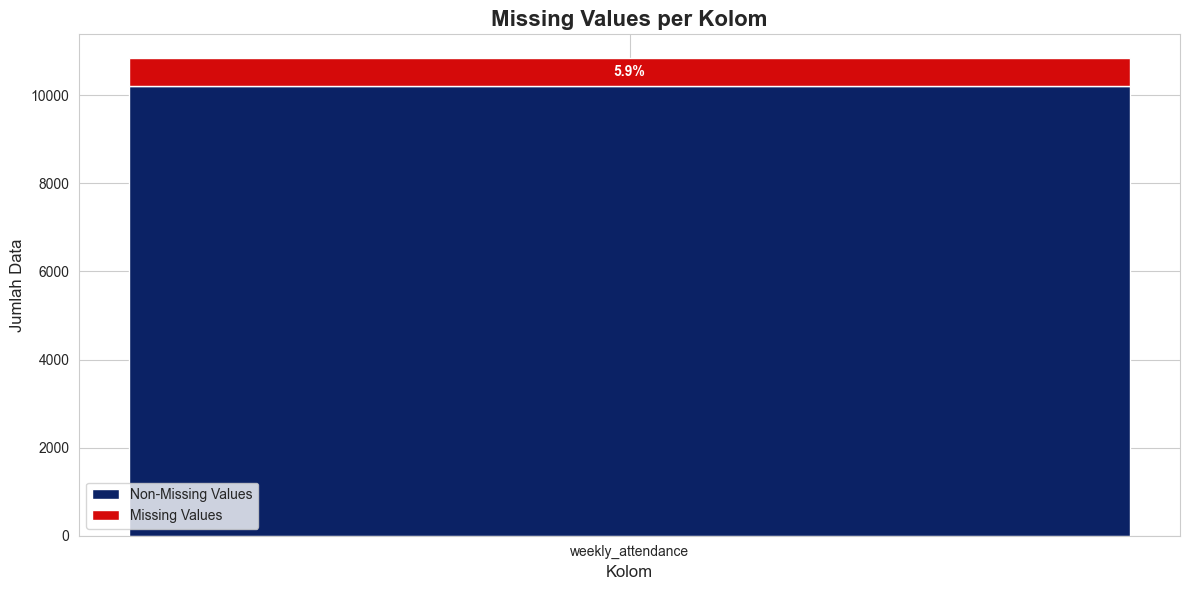

In [198]:
# Visualisasi Perbandingan Missing Values dan Non-Missing Values
missing_df['Non Missing Count'] = len(merged_df) - missing_df['Missing Count']
plt.figure(figsize=(12, 6))

plt.bar(missing_df.index,
        missing_df['Non Missing Count'],
        label='Non-Missing Values',
        color= nfl_palette)

plt.bar(missing_df.index,
        missing_df['Missing Count'],
        bottom=missing_df['Non Missing Count'],
        label='Missing Values',
        color= '#D50A0A')

plt.title('Missing Values per Kolom', fontsize=16, fontweight='bold')
plt.ylabel('Jumlah Data', fontsize=12)
plt.xlabel('Kolom', fontsize=12)

for i, (col, row) in enumerate(missing_df.iterrows()):
    plt.text(i,
             row['Non Missing Count'] + row['Missing Count'] * 0.5,
             f"{row['Missing Percentage']:.1f}%",
             ha='center',
             va='center',
             color='white',
             fontweight='bold')

plt.legend()
plt.tight_layout()
plt.show()

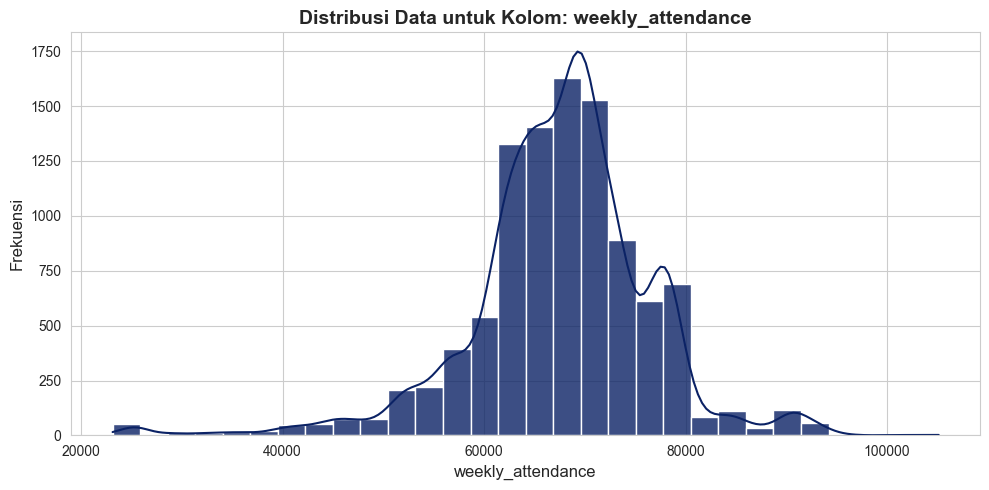

In [199]:
for col in missing_df.index:

    if not pd.api.types.is_numeric_dtype(merged_df[col]):
        print(f"Kolom '{col}' bukan numerik, dilewati.")
        continue

    plt.figure(figsize=(10, 5))

    sns.histplot(
        merged_df[col].dropna(),
        kde=True,
        bins=30,
        color='#0B2265',
        alpha=0.8
    )

    plt.title(f'Distribusi Data untuk Kolom: {col}',
              fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)

    plt.tight_layout()
    plt.show()

##### **2.2 Cek Duplicate Rows**
###### *SubTask*:
Mengidentifikasi dan mendapatkan total dari baris yang duplikat pada DataFrame **`merged_df`** dan **`games`**. Kemudian mengidentifikasi duplikat berdasarkan kolom `team`, `year`, dan `week`.

Untuk mengidentifikasi dan mendapatkan jumlah total duplikasi baris, kami menggunakan duplicated() pada DataFrame **`merged_df`** dan **`games`**.

In [200]:
exact_duplicates_games_count = games.duplicated().sum()
print(f"Jumlah exact duplicate rows: {exact_duplicates_games_count}")

Jumlah exact duplicate rows: 0


In [201]:
exact_duplicates_count = merged_df.duplicated().sum()
print(f"Jumlah exact duplicate rows: {exact_duplicates_count}")

Jumlah exact duplicate rows: 0


Setelah mendapatkan 0 total baris yang duplikat berdasarkan key value.


In [202]:
key_duplicates_games_count = games.duplicated(subset=['away_team', 'home_team', 'year', 'week']).sum()
print(f"Jumlah duplicate rows berdasarkan ['away_team', 'home_team', 'year', 'week']: {key_duplicates_games_count}")

Jumlah duplicate rows berdasarkan ['away_team', 'home_team', 'year', 'week']: 0


In [203]:
key_duplicates_count = merged_df.duplicated(subset=['team', 'year', 'week']).sum()
print(f"Jumlah duplicate rows berdasarkan ['team', 'year', 'week']: {key_duplicates_count}")

Jumlah duplicate rows berdasarkan ['team', 'year', 'week']: 391


##### **2.3 Cek Data Types dan Unique Values**
###### *SubTask*:
Mengidentifikasi tipe data untuk mencegah potensi data tidak konsisten dan mengidentifikasi unique value pada kolom kategorik untuk mencegah adanya kesalahan ketik atau kesalahan pada saat input data.

In [204]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10846 entries, 0 to 10845
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  10846 non-null  object 
 1   team_name             10846 non-null  object 
 2   year                  10846 non-null  int64  
 3   total                 10846 non-null  int64  
 4   home                  10846 non-null  int64  
 5   away                  10846 non-null  int64  
 6   week                  10846 non-null  int64  
 7   weekly_attendance     10208 non-null  float64
 8   wins                  10846 non-null  int64  
 9   loss                  10846 non-null  int64  
 10  points_for            10846 non-null  int64  
 11  points_against        10846 non-null  int64  
 12  points_differential   10846 non-null  int64  
 13  margin_of_victory     10846 non-null  float64
 14  strength_of_schedule  10846 non-null  float64
 15  simple_rating      

In [205]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5324 entries, 0 to 5323
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            5324 non-null   int64 
 1   week            5324 non-null   object
 2   home_team       5324 non-null   object
 3   away_team       5324 non-null   object
 4   winner          5324 non-null   object
 5   tie             10 non-null     object
 6   day             5324 non-null   object
 7   date            5324 non-null   object
 8   time            5324 non-null   object
 9   pts_win         5324 non-null   int64 
 10  pts_loss        5324 non-null   int64 
 11  yds_win         5324 non-null   int64 
 12  turnovers_win   5324 non-null   int64 
 13  yds_loss        5324 non-null   int64 
 14  turnovers_loss  5324 non-null   int64 
 15  home_team_name  5324 non-null   object
 16  home_team_city  5324 non-null   object
 17  away_team_name  5324 non-null   object
 18  away_tea

Setelah tipe data teridentifikasi, selanjutnya kami sorting untuk mengambil kolom dengan tipe data kategorik dan mengidentifikasi kesalahan yang ada pada kolom tersebut.

In [206]:
categorical_cols_games = games.select_dtypes(include='object').columns
print("Categorical Columns:")
for col in categorical_cols_games:
    print(f"- {col}")

Categorical Columns:
- week
- home_team
- away_team
- winner
- tie
- day
- date
- time
- home_team_name
- home_team_city
- away_team_name
- away_team_city


In [207]:
print("Unique Values pada Categorical Columns:")
for col in categorical_cols_games:
    print(f"\n--- Column: {col} ---")
    print(games[col].unique())

Unique Values pada Categorical Columns:

--- Column: week ---
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17' 'WildCard' 'Division' 'ConfChamp' 'SuperBowl']

--- Column: home_team ---
['Minnesota Vikings' 'Kansas City Chiefs' 'Washington Redskins' 'Atlanta Falcons' 'Pittsburgh Steelers' 'Cleveland Browns'
 'New England Patriots' 'New Orleans Saints' 'New York Giants' 'Dallas Cowboys' 'Oakland Raiders' 'Miami Dolphins'
 'Green Bay Packers' 'Buffalo Bills' 'St. Louis Rams' 'Cincinnati Bengals' 'Indianapolis Colts' 'Tampa Bay Buccaneers'
 'Baltimore Ravens' 'Philadelphia Eagles' 'Tennessee Titans' 'San Diego Chargers' 'San Francisco 49ers' 'Seattle Seahawks'
 'Detroit Lions' 'Denver Broncos' 'Arizona Cardinals' 'New York Jets' 'Jacksonville Jaguars' 'Carolina Panthers'
 'Chicago Bears' 'Houston Texans' 'Los Angeles Rams' 'Los Angeles Chargers']

--- Column: away_team ---
['Chicago Bears' 'Indianapolis Colts' 'Carolina Panthers' 'San Francisco 49ers' 'Baltimore

In [208]:
categorical_cols = merged_df.select_dtypes(include='object').columns
print("Categorical Columns:")
for col in categorical_cols:
    print(f"- {col}")

Categorical Columns:
- team
- team_name
- playoffs
- sb_winner


In [209]:
print("Unique Values pada Categorical Columns:")
for col in categorical_cols:
    print(f"\n--- Column: {col} ---")
    print(merged_df[col].unique())

Unique Values pada Categorical Columns:

--- Column: team ---
['Arizona' 'Atlanta' 'Baltimore' 'Buffalo' 'Carolina' 'Chicago' 'Cincinnati' 'Cleveland' 'Dallas' 'Denver' 'Detroit'
 'Green Bay' 'Indianapolis' 'Jacksonville' 'Kansas City' 'Miami' 'Minnesota' 'New England' 'New Orleans' 'New York'
 'Oakland' 'Philadelphia' 'Pittsburgh' 'San Diego' 'San Francisco' 'Seattle' 'St. Louis' 'Tampa Bay' 'Tennessee'
 'Washington' 'Houston' 'Los Angeles']

--- Column: team_name ---
['Cardinals' 'Falcons' 'Ravens' 'Bills' 'Panthers' 'Bears' 'Bengals' 'Browns' 'Cowboys' 'Broncos' 'Lions' 'Packers'
 'Colts' 'Jaguars' 'Chiefs' 'Dolphins' 'Vikings' 'Patriots' 'Saints' 'Giants' 'Jets' 'Raiders' 'Eagles' 'Steelers'
 'Chargers' '49ers' 'Seahawks' 'Rams' 'Buccaneers' 'Titans' 'Redskins' 'Texans']

--- Column: playoffs ---
['No Playoffs' 'Playoffs']

--- Column: sb_winner ---
['No Superbowl' 'Won Superbowl']


##### **2.4 Cek Outliers pada Numerical Columns**
###### *SubTask*:
Setelah mengidentifikasi kesalahan pada kolom dengan tipe data kategorik, selanjutnya kami mendeteksi outliers untuk tipe data numerik dengan IQR method dan melakukan visualisasi boxplot.


In [210]:
numerical_cols_games = games.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
for col in numerical_cols_games:
    print(f"- {col}")

Numerical Columns:
- year
- pts_win
- pts_loss
- yds_win
- turnovers_win
- yds_loss
- turnovers_loss


In [211]:
outliers = {}
for col in numerical_cols_games:
    Q1 = games[col].quantile(0.25)
    Q3 = games[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    col_games_outliers = games[(games[col] < lower_bound) | (games[col] > upper_bound)]
    if not col_games_outliers.empty:
        outliers[col] = {
            'count': len(col_games_outliers),
            'percentage': (len(col_games_outliers) / len(games)) * 100,
            'values': col_games_outliers[col].tolist() # Store outlier values for inspection
        }

print("Outliers dengan IQR method:")
for col, data in outliers.items():
    print(f"\n--- Column: {col} ---")
    print(f"  Jumlah Outlier: {data['count']}")
    print(f"  Persentase Outlier: {data['percentage']:.2f}%")
    print(f"  Sample Outlier Values: {data['values'][:10]}...")

Outliers dengan IQR method:

--- Column: pts_win ---
  Jumlah Outlier: 27
  Persentase Outlier: 0.51%
  Sample Outlier Values: [57, 54, 55, 56, 58, 56, 56, 56, 54, 59]...

--- Column: pts_loss ---
  Jumlah Outlier: 44
  Persentase Outlier: 0.83%
  Sample Outlier Values: [38, 38, 39, 39, 38, 38, 41, 38, 48, 39]...

--- Column: yds_win ---
  Jumlah Outlier: 50
  Persentase Outlier: 0.94%
  Sample Outlier Values: [614, 128, 579, 142, 134, 645, 47, 591, 134, 121]...

--- Column: turnovers_win ---
  Jumlah Outlier: 6
  Persentase Outlier: 0.11%
  Sample Outlier Values: [7, 6, 6, 6, 6, 6]...

--- Column: yds_loss ---
  Jumlah Outlier: 24
  Persentase Outlier: 0.45%
  Sample Outlier Values: [53, 552, 567, 26, 542, 545, 595, 552, 77, 72]...

--- Column: turnovers_loss ---
  Jumlah Outlier: 26
  Persentase Outlier: 0.49%
  Sample Outlier Values: [7, 7, 8, 7, 8, 7, 7, 7, 7, 7]...


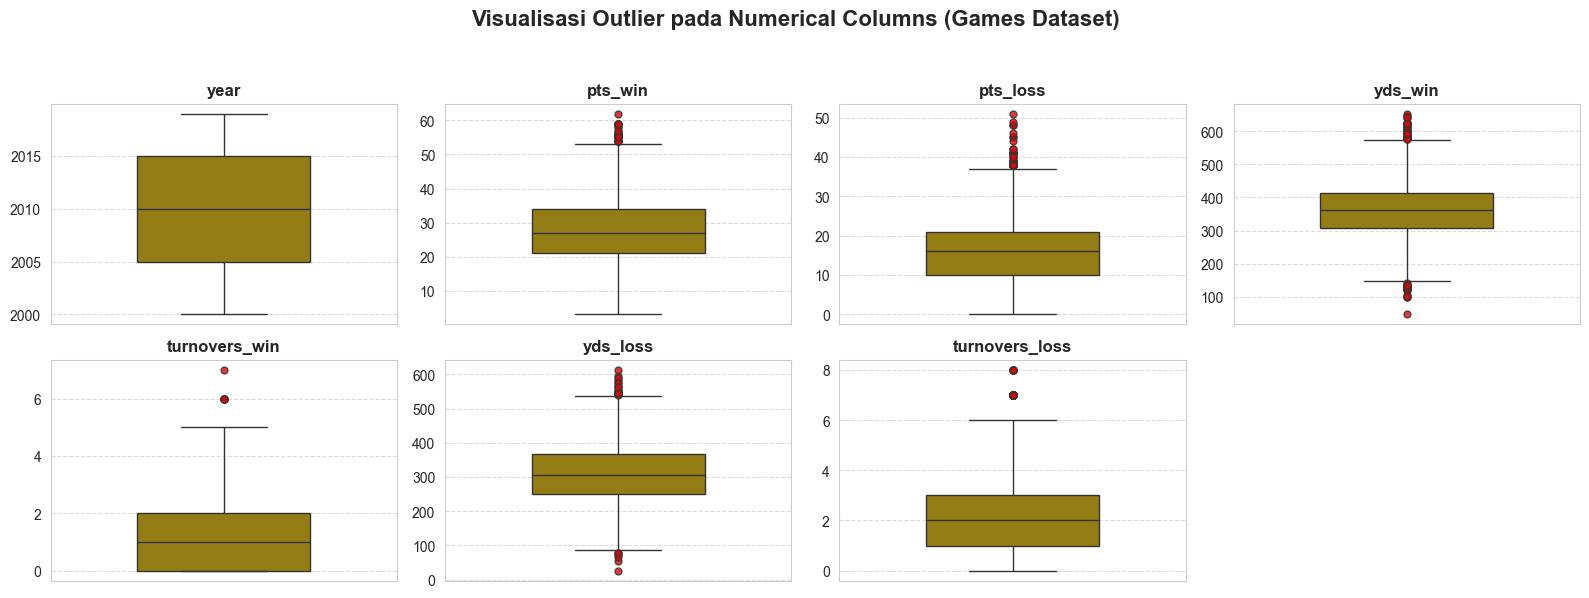

In [212]:
num_cols_games_to_plot = len(numerical_cols_games)
n_cols = 4
n_rows = int(np.ceil(num_cols_games_to_plot / n_cols))

plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle('Visualisasi Outlier pada Numerical Columns (Games Dataset)', fontsize=16, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_cols_games):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    sns.boxplot(
        y=games[col],
        ax=ax,
        color='#AA8A00',
        width=0.5,
        flierprops={
            'marker':'o',
            'markerfacecolor':'#D50A0A',
            'markersize':5,
            'alpha':0.8
        }
    )

    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

In [213]:
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
for col in numerical_cols:
    print(f"- {col}")

Numerical Columns:
- year
- total
- home
- away
- week
- weekly_attendance
- wins
- loss
- points_for
- points_against
- points_differential
- margin_of_victory
- strength_of_schedule
- simple_rating
- offensive_ranking
- defensive_ranking


In [214]:
outliers = {}
for col in numerical_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    col_outliers = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)]
    if not col_outliers.empty:
        outliers[col] = {
            'count': len(col_outliers),
            'percentage': (len(col_outliers) / len(merged_df)) * 100,
            'values': col_outliers[col].tolist() # Store outlier values for inspection
        }

print("Outliers dengan IQR method:")
for col, data in outliers.items():
    print(f"\n--- Column: {col} ---")
    print(f"  Jumlah Outlier: {data['count']}")
    print(f"  Persentase Outlier: {data['percentage']:.2f}%")
    print(f"  Sample Outlier Values: {data['values'][:10]}...")

Outliers dengan IQR method:

--- Column: total ---
  Jumlah Outlier: 425
  Persentase Outlier: 3.92%
  Sample Outlier Values: [893926, 893926, 893926, 893926, 893926, 893926, 893926, 893926, 893926, 893926]...

--- Column: home ---
  Jumlah Outlier: 442
  Persentase Outlier: 4.08%
  Sample Outlier Values: [387475, 387475, 387475, 387475, 387475, 387475, 387475, 387475, 387475, 387475]...

--- Column: away ---
  Jumlah Outlier: 136
  Persentase Outlier: 1.25%
  Sample Outlier Values: [475595, 475595, 475595, 475595, 475595, 475595, 475595, 475595, 475595, 475595]...

--- Column: weekly_attendance ---
  Jumlah Outlier: 536
  Persentase Outlier: 4.94%
  Sample Outlier Values: [44296.0, 38293.0, 35286.0, 42094.0, 37452.0, 46178.0, 44680.0, 41017.0, 37452.0, 47230.0]...

--- Column: points_for ---
  Jumlah Outlier: 102
  Persentase Outlier: 0.94%
  Sample Outlier Values: [589, 589, 589, 589, 589, 589, 589, 589, 589, 589]...

--- Column: points_against ---
  Jumlah Outlier: 34
  Persentase O

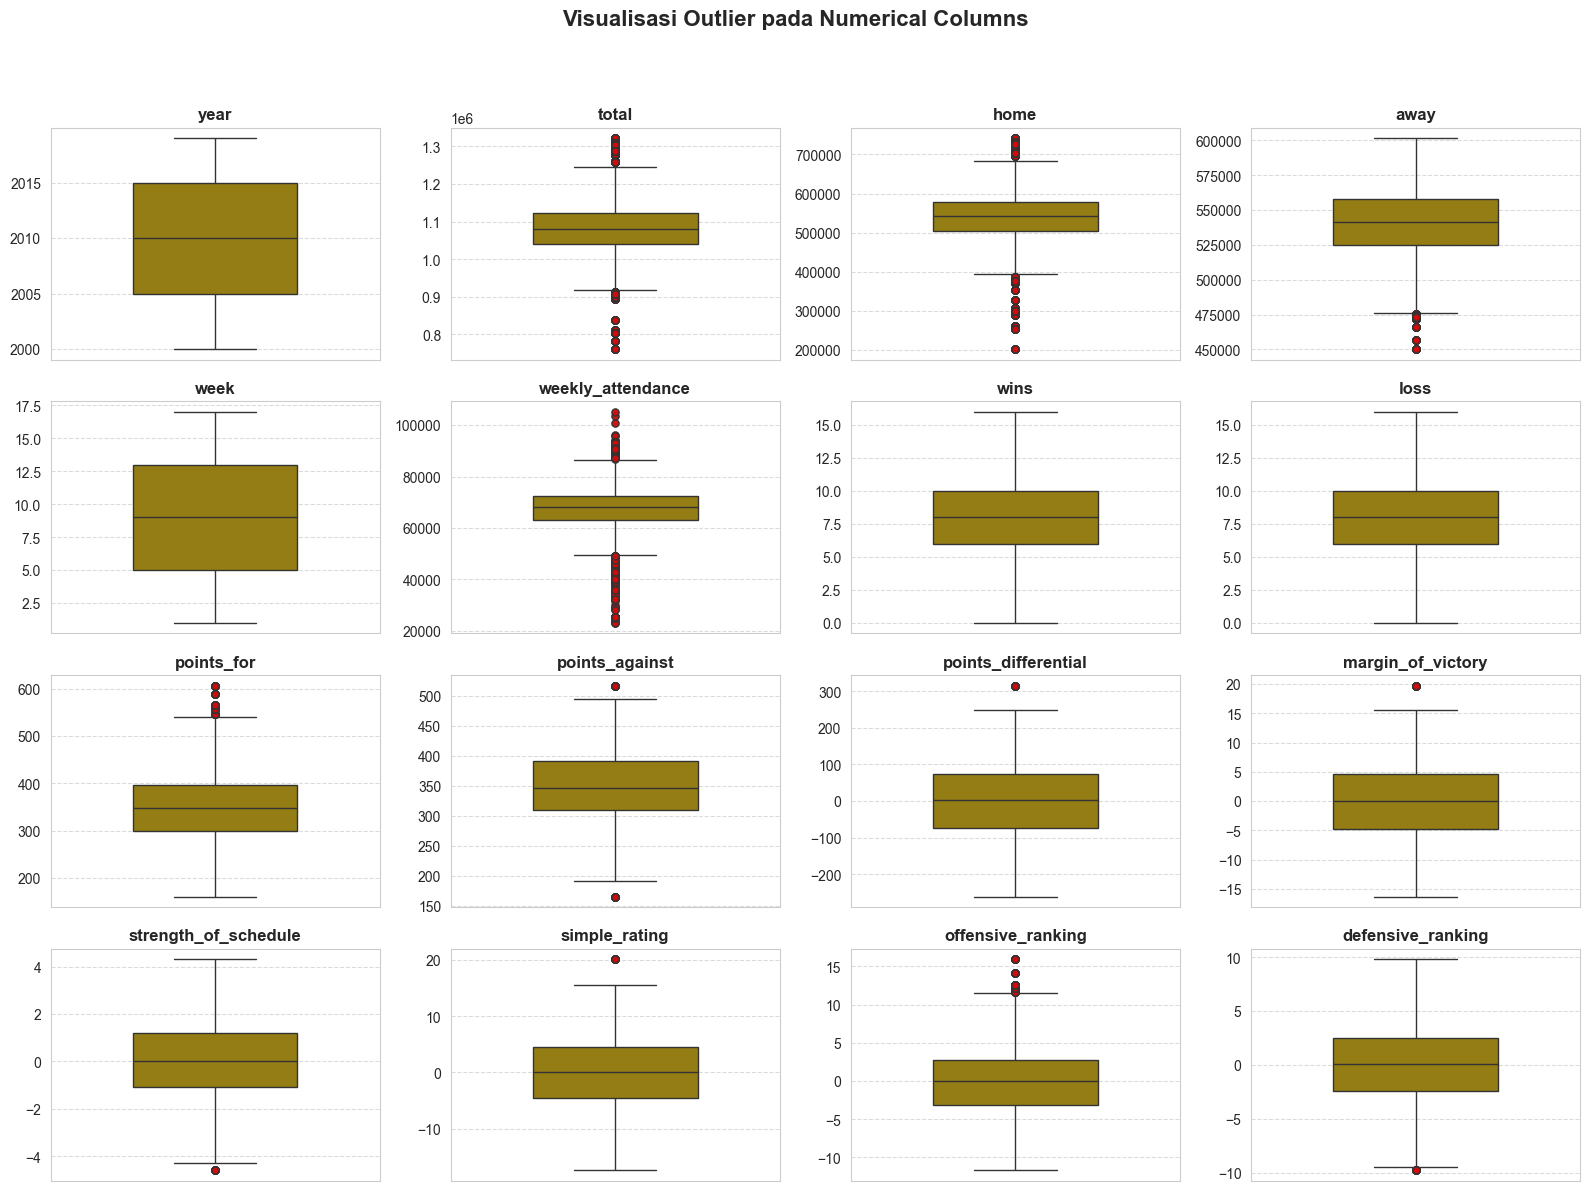

In [215]:
num_cols_to_plot = len(numerical_cols)
n_cols = 4
n_rows = int(np.ceil(num_cols_to_plot / n_cols))

plt.figure(figsize=(n_cols * 4, n_rows * 3))
plt.suptitle('Visualisasi Outlier pada Numerical Columns', fontsize=16, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=merged_df[col], ax=ax, color='#AA8A00', width=0.5, flierprops={'marker':'o', 'markerfacecolor':'#D50A0A', 'markersize':5, 'alpha':0.8})
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])

#### **2.5 Summary**

*   *Missing Values:*

Pada DataFrame `merge_df`hanya ada satu kolom yang memiliki missing value, yaitu `weekly_attendance` dengan missing values mencapai 638, atau sekitar 5.88% dari seluruh dataset yang kami tangani menggunakan input mean. Pada DataFrame `games` didapatkan 5314, atau sekitar 99.81% dari seluruh dataset dengan dugaan pada pertandingan itu outputnya bukan tie/seri. Sehingga kami lakukan inputasi keterangan "no" pada missing value.

*   *Duplicate Rows:*

Dilakukan dua jenis pemeriksaan duplikasi:

1. Duplikasi baris persis sama (exact duplicate):
Hasilnya tidak ditemukan baris yang benar-benar identik di seluruh kolom pada kedua DataFrame.

2. Duplikasi berdasarkan kombinasi key value:
Ditemukan 391 baris pada DataFrame `merged_df` yang memiliki kombinasi nilai team, year, dan week yang sama. Dalam dataset terdapat beberapa record berbeda yang merujuk pada tim yang sama dan pada tahun serta minggu yang sama. Hal ini menunjukkan terjadi duplikasi berdasarkan key.

*   *Data Types:*

DataFrame `games` ini memiliki total 19 kolom dengan struktur tipe data sebagai berikut:

1. 7 kolom bertipe int64 → nilai numerik bilangan bulat seperti jumlah poin, ranking, atau total tertentu.

2. 12 kolom bertipe object → berisi data kategorikal atau teks.

DataFrame `merged_df` ini memiliki total 20 kolom dengan struktur tipe data sebagai berikut:

1. 4 kolom bertipe object → berisi data kategorikal atau teks.

2. 6 kolom bertipe float64 → nilai numerik desimal seperti skor, rating, atau persentase.

3. 10 kolom bertipe int64 → nilai numerik bilangan bulat seperti jumlah poin, ranking, atau total tertentu.

Semua tipe data sudah sesuai dengan karakteristik kolom masing-masing dan tidak menunjukkan adanya kesalahan pada tipe data.

*   *Categorical Column Consistency:*

Terdapat 12 kolom kategorikal pada DataFrame `games`, yaitu:
`week`, `home_team`, `away_team`, `winner`, `tie`, `day`, `date`, `time`, `home_team_name`, `home_team_city`, `away_team_name`, `away_team_city`

Terdapat 4 kolom kategorikal pada DataFrame `merged_df`, yaitu:
`team`, `team_name`, `playoffs`, dan `sb_winner`.

Semua nilai unik dalam tiap kolom ini konsisten dan bebas dari kesalahan ketik atau penulisan.

*   *Numerical Outliers:*

Outlier diidentifikasi menggunakan metode Interquartile Range (IQR).
Beberapa kolom numerik memiliki persentase outlier yang cukup signifikan pada DataFrame `merged_df` dengan persentase sebagai berikut:

1. `total`: 425 outlier (3.92%)

2. `home`: 442 outlier (4.08%)

3. `away`: 136 outlier (1.25%)

4. `weekly_attendance`: 536 outlier (4.94%)

5. `offensive_ranking`: 119 outlier (1.10%)

Selain itu, kolom seperti `points_for`,`points_against`, `points_differential`, `margin_of_victory`, `strength_of_schedule`, `simple_rating`, dan `defensive_ranking` juga memiliki jumlah outlier kecil (sekitar 0.16% – 0.94%).

Pada DataFrame `games` tidak terdapat outlier dengan persentase mencapai 1%. Kolom dengan outlier tertinggi adalah `yds_win` (0.94%) dan `pts_loss` (0.83%). Selain itu nilai outlier ada pada kisaran 0.11% - 0.51% dengan rincian kolom `pts_win`, `yds_loss`, `turnovers_win`, dan `turnovers_loss`.

Secara keseluruhan, outlier memang ada di beberapa kolom, terutama yang menggambarkan skor, penonton, dan performa (variasi masih dalam konteks olahraga).


#### **#3 Standardization and Transformation**

##### **3.1 Menangani Missing Values dengan Imputasi Median**
###### *SubTask*:
Input mean untuk menangani missing value pada kolom "weekly_attendance", dan input "no" pada kolom "tie".

Pada DataFrame **`games`** di kolom "tie" ditemukan 99.81% missing value yang kami asumsikan bahwa output pertandingan bukanlah seri/tie. Sehingga kami mengisi missing value dengan keterangan "no" yang mengindikasikan output pertandingan bukan seri (terdapat kemenangan).

In [216]:
keterangan = "no"
games['tie'] = games['tie'].fillna(keterangan)

In [217]:
games['tie'].isnull().sum()

np.int64(0)

Dalam proses identifikasi missing value, ditemukan sebanyak 5.88% pada kolom `weekly_attendance` (persentase tidak memungkinkan untuk drop missing values) dengan jenis Missing At Random (MAR). Hal ini akan memicu kesalahan pada analisa jika tidak ditangani. Berdasarkan visualisasi distribusi data pada kolom `weekly_attandance`, kami berasumsi bahwa data skewed ke kiri dan tidak berdistribusi normal sehingga penanganan missing value menggunakan median merupakan metode yang cocok.

In [218]:
median_weekly = merged_df['weekly_attendance'].median()
print("Median weekly_attendance:", median_weekly)
merged_df['weekly_attendance'] = merged_df['weekly_attendance'].fillna(median_weekly)

Median weekly_attendance: 68334.0


In [219]:
merged_df['weekly_attendance'].isnull().sum()

np.int64(0)

##### **3.2 Menghapus Kolom dengan Data Duplikat**
###### *SubTask*:
Menghapus baris yang duplikasi.

Setelah dilakukan 2 analisa duplikasi data berdasarkan key value yang berbeda, ditemukan sebanyak 391 baris duplikat berdasarkan key value `team`, `year`, dan `week`. Jika dipertahankan, baris tersebut tidak memberikan informasi tambahan dan akan mengganggu tingkat konsisten serta integritas data. Dengan penjabaran alasan tersebut, kami menangani duplikasi baris dengan menghapus/drop baris tersebut.

In [220]:
merged_df = merged_df.drop_duplicates(subset=['team', 'year', 'week'], keep='first')
print(merged_df.duplicated(subset=['team', 'year', 'week']).sum())

0


In [221]:
print(merged_df.shape)

(10455, 20)


#### **#4 Export Cleaned Dataset**

In [222]:
attendance_cols = ['team', 'team_name', 'year', 'total', 'home', 
                   'away', 'week', 'weekly_attendance']
attendance_cleaned = merged_df[attendance_cols]

standings_cols = ['team', 'team_name', 'year', 'wins', 'loss', 
                  'points_for', 'points_against', 'points_differential',
                  'margin_of_victory', 'strength_of_schedule', 
                  'simple_rating', 'offensive_ranking', 
                  'defensive_ranking', 'playoffs', 'sb_winner']
standings_cleaned = merged_df[standings_cols]

games_cols = ['year', 'week', 'home_team', 'away_team', 'winner', 'tie', 
              'day', 'date', 'time', 'pts_win', 'pts_loss', 'yds_win',
              'turnovers_win', 'yds_loss', 'turnovers_loss', 
              'home_team_name', 'home_team_city', 'away_team_name', 
              'away_team_city']
games_cleaned = games[games_cols]

attendance_cleaned.to_csv("../data/processed/attendance_cleaned.csv", index=False)
standings_cleaned.to_csv("../data/processed/standings_cleaned.csv", index=False)
games_cleaned.to_csv("../data/processed/games_cleaned.csv", index=False)


# **D. EXPLORATORY DATA ANALYSIS**

#### **#1 Visualization**

##### **1.1 📈 Yearly Attendance Trend**
Mengidentifikasi tren kehadiran penonton NFL dengan memvisualisasikan rata-rata `weekly_attendance` dari tahun ke tahun

In [223]:
# Insialisasi Variabel y dengan Rata-Rata Attendance
y = merged_df.groupby('year')['weekly_attendance'].agg('mean')

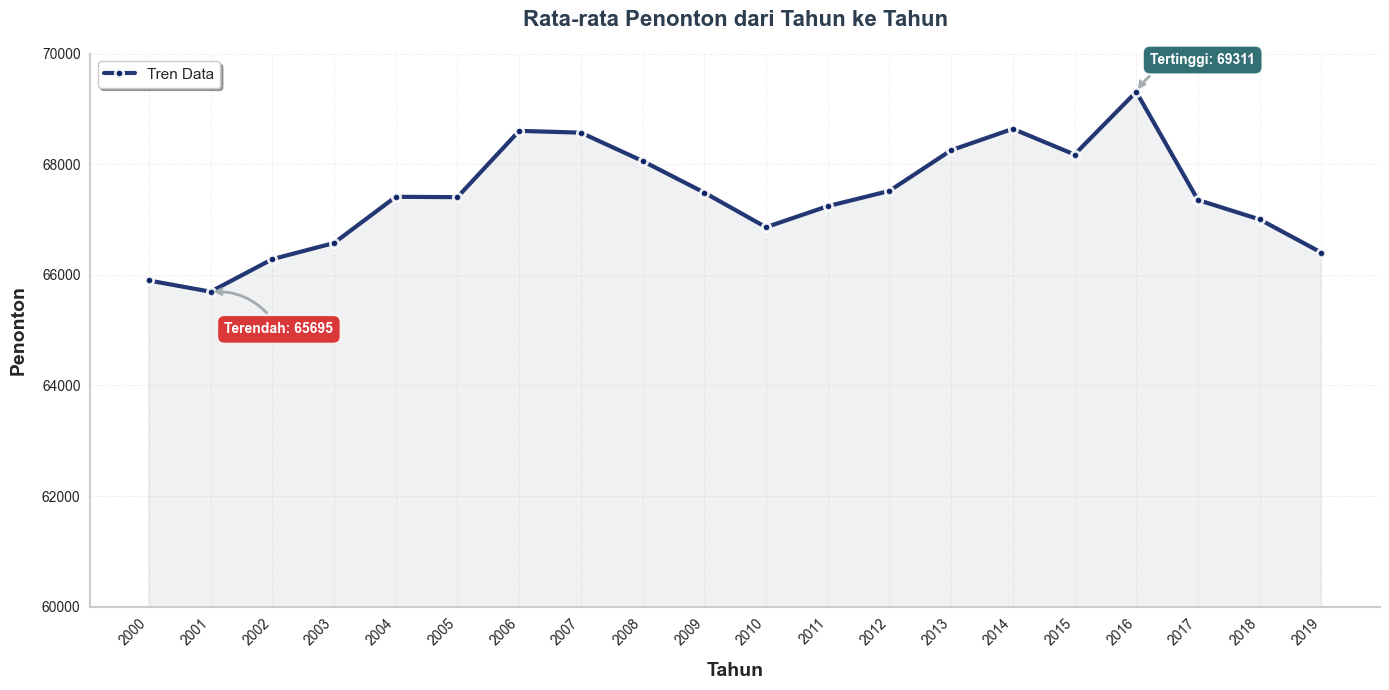

In [224]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

ax = plt.gca()

# Line Plot Tren Rata-Rata Attendance
line = ax.plot(y.index, y,
               linewidth=3,
               color='#0B2265',
               marker='o',
               markersize=6,
               markerfacecolor='#0B2265',
               markeredgewidth=2,
               markeredgecolor='white',
               label='Tren Data',
               alpha=0.9,
               zorder=3)

# Shaded Area di bawah Line Plot
ax.fill_between(y.index, y,
                alpha=0.25,
                color='#C5C8CF',
                zorder=1)

# Add Grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)

# Add Judul
ax.set_title('Rata-rata Penonton dari Tahun ke Tahun',
             fontsize=16,
             fontweight='bold',
             pad=20,
             color='#2C3E50')

# Add Keterangan Sumbu x dan y
ax.set_xlabel('Tahun', fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel('Penonton', fontsize=14, fontweight='bold', labelpad=10)

ax.set_ylim(60000, 70000)

plt.xticks(y.index, rotation=45, ha='right')

# Add Legend
plt.legend(frameon=True,
          shadow=True,
          fancybox=True,
          fontsize=11,
          loc='best')

max_idx = np.argmax(y)
min_idx = np.argmin(y)

# Keterangan Attendance Tertinggi
ax.annotate(f'Tertinggi: {int(y.iloc[max_idx])}',
            xy=(y.index[max_idx], y.iloc[max_idx]),
            xytext=(10, 20),
            textcoords='offset points', color='white',
            bbox=dict(boxstyle='round,pad=0.5', fc='#004C54', alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                           color='#A5ACAF', lw=2),
            fontsize=10,
            fontweight='bold')

# Keterangan Attendance Terendah
ax.annotate(f'Terendah: {int(y.iloc[min_idx])}',
            xy=(y.index[min_idx], y.iloc[min_idx]),
            xytext=(10, -30),
            textcoords='offset points', color='white',
            bbox=dict(boxstyle='round,pad=0.5', fc='#D50A0A', alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3',
                           color='#A5ACAF', lw=2),
            fontsize=10,
            fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

**Interpretasi:**
- Kehadiran penonton NFL menunjukkan tren
relatif stabil sepanjang 20 tahun
- Rata-rata kehadiran berkisar antara 62,000 - 68,000 penonton per pertandingan
- Puncak kehadiran tercatat pada tahun 2016 dengan rata-rata sekitar 69.3K penonton.
- Nilai kehadiran terendah terjadi pada tahun 2001 dengan rata-rata 65K penonton.





##### **1.2 ⚔️ Team's Win Rate vs Attendance**
Mengidentifikasi perbandingan hubungan performa team berdarkan `winrate` dan banyaknya jumlah penonton yang menghadiri NFL setiap tahun berdasarkan `weekly_attendance`

In [225]:
# Create Column Win Rate
merged_df['winrate'] = merged_df['wins']/16

In [226]:
correlation = merged_df['winrate'].corr(merged_df['weekly_attendance'])
print(f"Correlation between winrate and weekly attendance: {correlation}")

Correlation between winrate and weekly attendance: 0.09516349017492273


In [227]:
conditions = [
    (merged_df['winrate'] == 0),
    (merged_df['winrate'] <= 0.25),
    (merged_df['winrate'] <= 0.5),
    (merged_df['winrate'] <= 0.75),
    (merged_df['winrate'] < 1),
    (merged_df['winrate'] == 1)
]

choices = [
    "No Win",
    "Poor",
    "Below Average",
    "Average",
    "Above Average",
    "Perfect Season"
]

merged_df['winrate_cat'] = np.select(conditions, choices, default='Unknown')

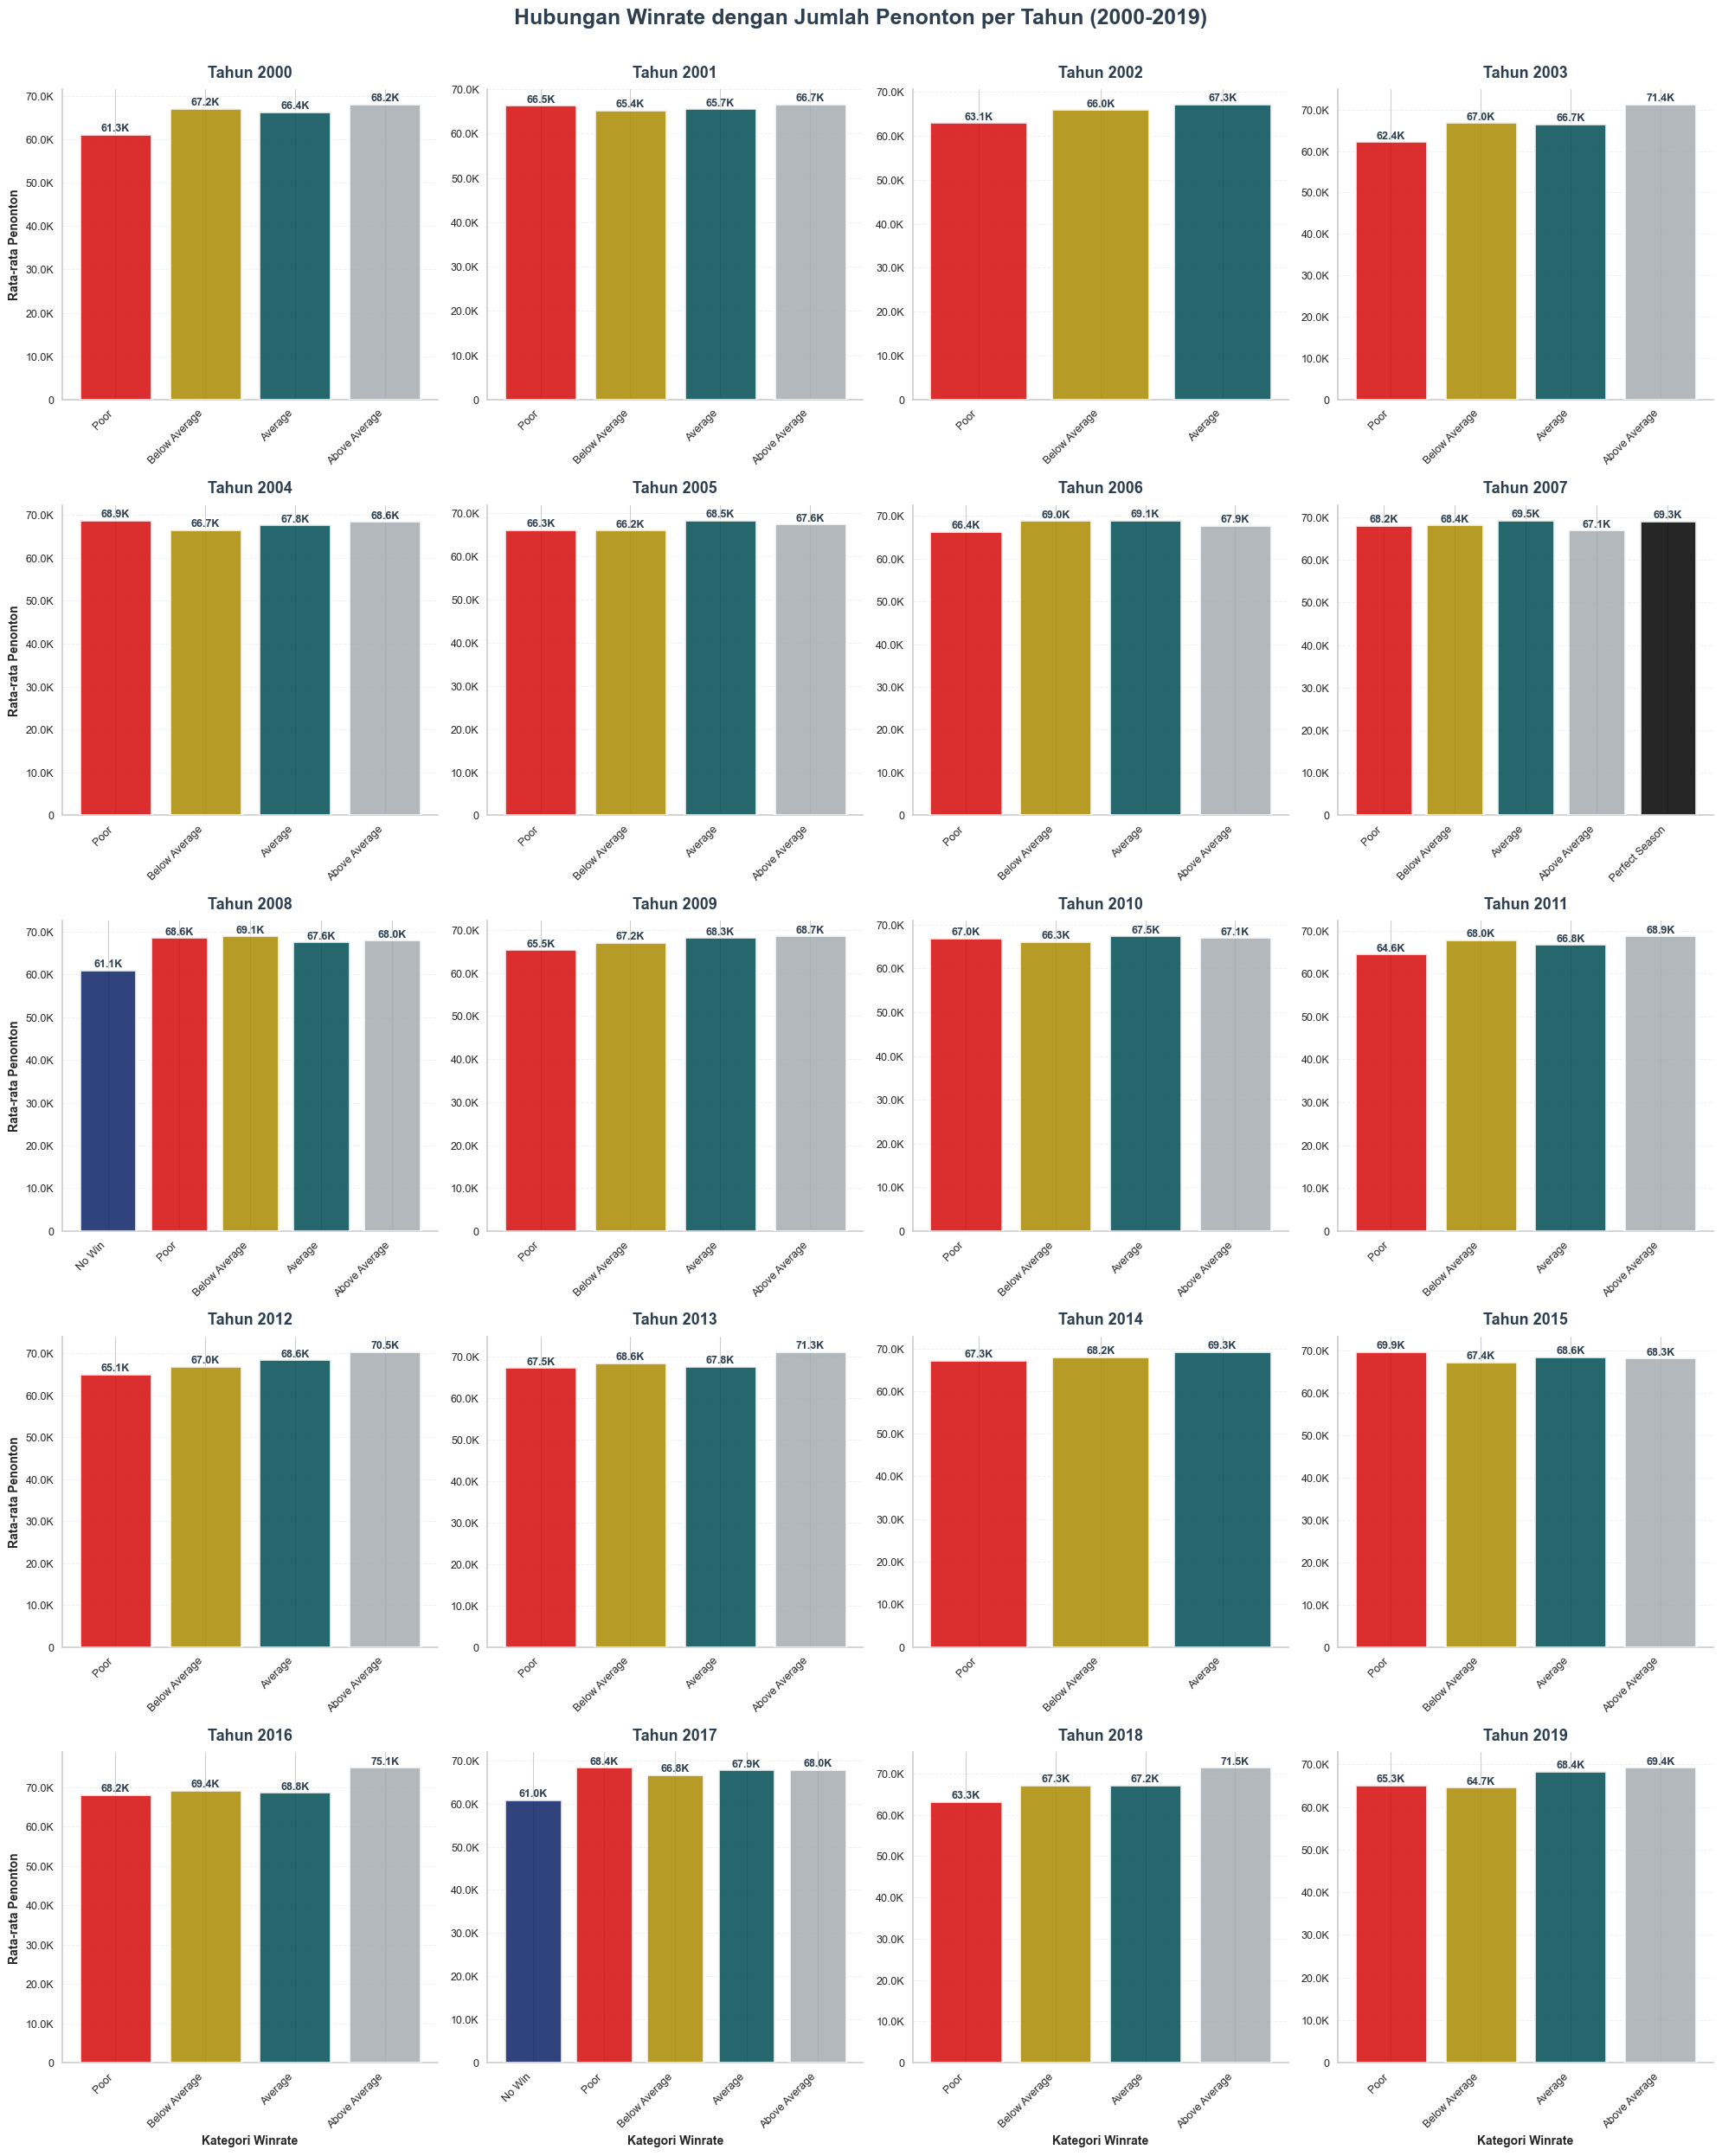

In [228]:
df_all_years = merged_df

# Create Urutan Kategori Win Rate
winrate_order = [
    "No Win",
    "Poor",
    "Below Average",
    "Average",
    "Above Average",
    "Perfect Season"
]

# Mengurutkan Data Berdasarkan Tahun
years = sorted(df_all_years['year'].unique())

# Plot
colors = nfl_palette

n_years = len(years)
n_cols = 4
n_rows = int(np.ceil(n_years / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

sns.set_style("whitegrid")

# Loop Plot Dari Tahun ke Tahun
for idx, year in enumerate(years):
    ax = axes[idx]
    df_year = df_all_years[df_all_years['year'] == year]

    # Calculate Rata-Rata Attendance per Win Rate Category
    attendance_by_winrate = df_year.groupby('winrate_cat')['weekly_attendance'].mean().reset_index()
    attendance_by_winrate['winrate_cat'] = pd.Categorical(
        attendance_by_winrate['winrate_cat'],
        categories=winrate_order,
        ordered=True
    )
    attendance_by_winrate = attendance_by_winrate.sort_values('winrate_cat')
    bar_colors = [colors[winrate_order.index(cat)] for cat in attendance_by_winrate['winrate_cat']]

    # Create Visualisasi Bar Chart
    bars = ax.bar(
        range(len(attendance_by_winrate)),
        attendance_by_winrate['weekly_attendance'],
        color=bar_colors,
        alpha=0.85,
        edgecolor='white',
        linewidth=2,
        zorder=3
    )

    for i, bar in enumerate(bars):
        height = bar.get_height()

        # Format angka menjadi ribuan (K)
        if height >= 1000:
            label = f'{height/1000:.1f}K'
        else:
            label = f'{int(height)}'

        # Add Value Labels
        ax.text(bar.get_x() + bar.get_width()/2., height,
                label,
                ha='center', va='bottom',
                fontsize=9, fontweight='bold',
                color='#2C3E50')

    # Add Grid
    ax.grid(axis='y', linestyle='--', alpha=0.3, linewidth=0.7, zorder=0)
    ax.set_axisbelow(True)

    # Add Judul per Tahun
    ax.set_title(f'Tahun {int(year)}', fontsize=13, fontweight='bold', pad=10, color='#2C3E50')

    # Keterangan Sumbu x
    ax.set_xticks(range(len(attendance_by_winrate)))
    ax.set_xticklabels(attendance_by_winrate['winrate_cat'],
                       rotation=45, ha='right', fontsize=9)


    # Format Sumbu y
    def format_thousands(x, p):
        if x >= 1000:
            return f'{x/1000:.1f}K'
        else:
            return f'{int(x)}'

    ax.yaxis.set_major_formatter(plt.FuncFormatter(format_thousands))
    ax.tick_params(axis='y', labelsize=9)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)

    # Keterangan Sumbu x dan y
    if idx % n_cols == 0:
        ax.set_ylabel('Rata-rata Penonton', fontsize=10, fontweight='bold')
    if idx >= (n_rows - 1) * n_cols:
        ax.set_xlabel('Kategori Winrate', fontsize=10, fontweight='bold')

# Hapus Subplot Kosong
for idx in range(n_years, len(axes)):
    axes[idx].set_visible(False)

# Add Judul Utama
fig.suptitle('Hubungan Winrate dengan Jumlah Penonton per Tahun (2000-2019)',
             fontsize=18, fontweight='bold', y=0.995, color='#2C3E50')

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

**Interpretasi:**
- Tim dengan kategori "Above Average" dan "Average" memiliki kehadiran yang tidak jauh berbeda
- Tim dengan "Perfect Season" justru tidak selalu memiliki kehadiran tertinggi, menunjukkan faktor lain lebih dominan
- Tim dengan kategori "Poor" dan "No Win" menunjukkan variasi kehadiran yang cukup besar, mengindikasikan loyal fan base pada beberapa tim tertentu

##### **1.3 📋 Attendance Correlation**
Mengidentifikasi faktor-faktor yang memengaruhi jumlah penonton yang hadir pada pertandingan dengan menganalisis korelasi antara `weekly_attendance` dan variabel-variabel lain pada **`merged_df`**

In [229]:
# Menghitung Korelasi weekly_attendance
correlation = merged_df.corr(numeric_only=True)['weekly_attendance']
print(correlation)

year                    0.045762
total                   0.487976
home                    0.457035
away                    0.203445
week                   -0.041066
weekly_attendance       1.000000
wins                    0.095163
loss                   -0.095626
points_for              0.100077
points_against         -0.050832
points_differential     0.100393
margin_of_victory       0.100442
strength_of_schedule    0.019516
simple_rating           0.107448
offensive_ranking       0.092073
defensive_ranking       0.074825
winrate                 0.095163
Name: weekly_attendance, dtype: float64


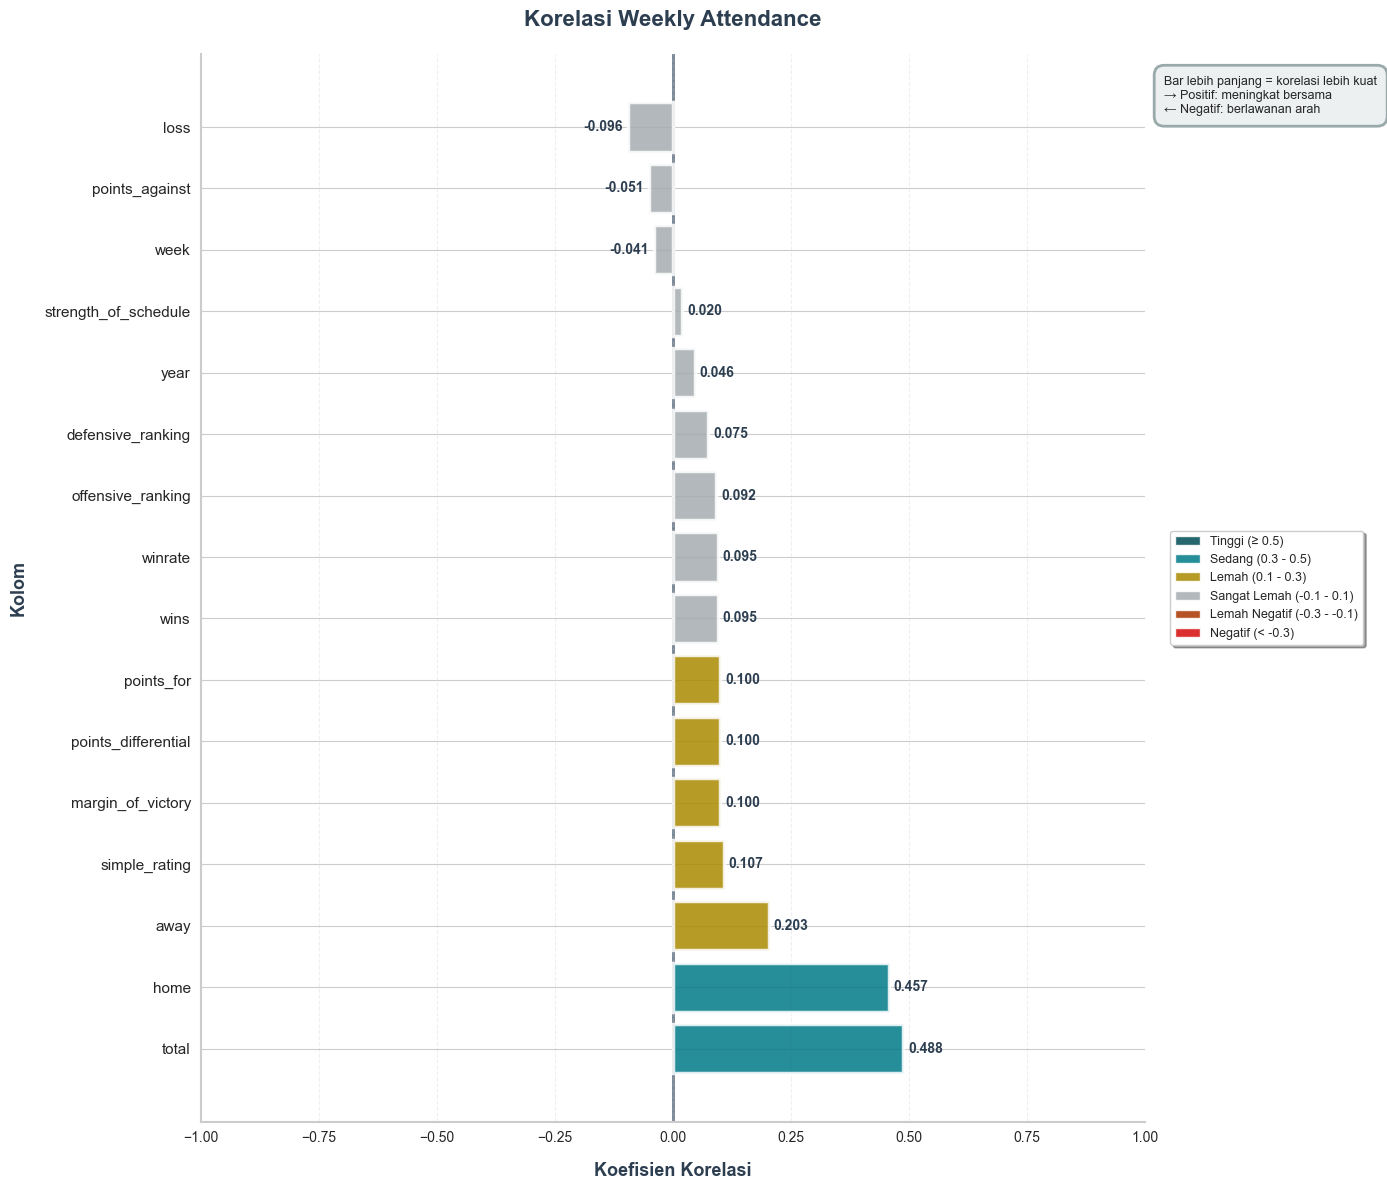

In [230]:
# Calculate Korelasi weekly_attendance
correlation = merged_df.corr(numeric_only=True)['weekly_attendance'].sort_values(ascending=False)
correlation = correlation.drop('weekly_attendance')

corr_df = pd.DataFrame({
    'Feature': correlation.index,
    'Correlation': correlation.values
})

fig, ax = plt.subplots(figsize=(14, 12))

# Create color palette - gradient dari biru (negatif) ke merah (positif)
colors = []
for val in correlation.values:
    if val >= 0.5:
        colors.append('#004C54')  # Hijau tua untuk korelasi tinggi positif
    elif val >= 0.3:
        colors.append('#007a87')  # Hijau untuk korelasi sedang positif
    elif val >= 0.1:
        colors.append('#AA8A00')  # Kuning untuk korelasi lemah positif
    elif val >= -0.1:
        colors.append('#A5ACAF')  # Abu-abu untuk korelasi sangat lemah
    elif val >= -0.3:
        colors.append('#AA3500')  # Orange untuk korelasi lemah negatif
    else:
        colors.append('#D50A0A')  # Merah untuk korelasi negatif

# Create Horizontal Bar Plot
bars = ax.barh(range(len(correlation)), correlation.values,
               color=colors, alpha=0.85, edgecolor='white', linewidth=2.5)

# Add Value Labels
for i, (bar, val) in enumerate(zip(bars, correlation.values)):
    # Position text based on bar direction
    if val >= 0:
        x_pos = val + 0.01
        ha = 'left'
    else:
        x_pos = val - 0.01
        ha = 'right'

    ax.text(x_pos, i, f'{val:.3f}',
            va='center', ha=ha, fontsize=10,
            fontweight='bold', color='#2C3E50')

# Set y-axis
ax.set_yticks(range(len(correlation)))
ax.set_yticklabels(correlation.index, fontsize=11)

# Add Vertical Line pada  x=0
ax.axvline(x=0, color='#34495E', linewidth=2, linestyle='-', alpha=0.7, zorder=0)

# Add grid
ax.grid(axis='x', linestyle='--', alpha=0.3, linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

# Set x-axis
ax.set_xlim(-1, 1)

ax.set_xlabel('Koefisien Korelasi', fontsize=13, fontweight='bold', labelpad=12, color='#2C3E50')
ax.set_ylabel('Kolom', fontsize=13, fontweight='bold', labelpad=12, color='#2C3E50')
ax.set_title('Korelasi Weekly Attendance',
             fontsize=16, fontweight='bold', pad=20, color='#2C3E50')

# Remove top dan right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add legend
legend_elements = [
    plt.Rectangle((0,0),1,1, fc='#004C54', alpha=0.85, label='Tinggi (≥ 0.5)'),
    plt.Rectangle((0,0),1,1, fc='#007a87', alpha=0.85, label='Sedang (0.3 - 0.5)'),
    plt.Rectangle((0,0),1,1, fc='#AA8A00', alpha=0.85, label='Lemah (0.1 - 0.3)'),
    plt.Rectangle((0,0),1,1, fc='#A5ACAF', alpha=0.85, label='Sangat Lemah (-0.1 - 0.1)'),
    plt.Rectangle((0,0),1,1, fc='#AA3500', alpha=0.85, label='Lemah Negatif (-0.3 - -0.1)'),
    plt.Rectangle((0,0),1,1, fc='#D50A0A', alpha=0.85, label='Negatif (< -0.3)')
]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.02, 0.5),
          frameon=True, fancybox=True, shadow=True, fontsize=9)

# Add insight box
textstr = 'Bar lebih panjang = korelasi lebih kuat\n→ Positif: meningkat bersama\n← Negatif: berlawanan arah'
props = dict(boxstyle='round,pad=0.8', facecolor='#ECF0F1', alpha=0.95,
             edgecolor='#95A5A6', linewidth=2)
ax.text(1.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

**Interpretasi:**
- Korelasi antara win rate dan kehadiran penonton adalah 0.095 (sangat lemah)
- Faktor dengan korelasi sedang: variabel total dengan korelasi 0.488 dan home dengan korelasi 0.457
- Faktor dengan korelasi lemah: variabel away dengan korelasi 0.203, simple_rating dengan korelasi 0.307, margin_of_victory, points_of_differential, dan points_for dengan korelasi 0.100
- Variabel lainnya menunjukkan korelasi sangat lemah yang artinya hampir tidak ada hubungan

##### **1.4 👥 Attendance Distribution**
Mengidentifikasi sebaran penonton yang menghadiri pertandingan melalui `week_attendance`

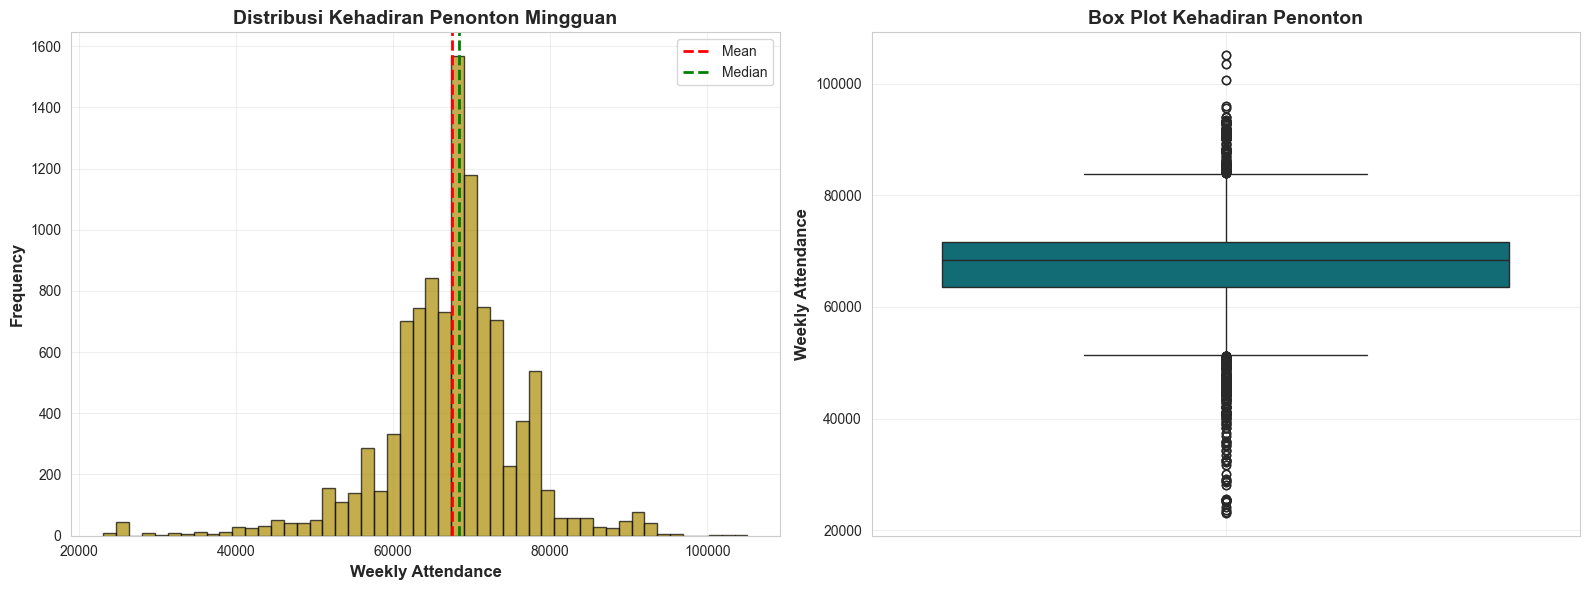

In [231]:
#  Distribusi Kehadiran Penonton (Histogram + Box Plot)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(merged_df['weekly_attendance'].dropna(),
             bins=50, color='#AA8A00', alpha=0.7, edgecolor='black')
axes[0].axvline(merged_df['weekly_attendance'].mean(),
                color='red', linestyle='--', linewidth=2, label='Mean')
axes[0].axvline(merged_df['weekly_attendance'].median(),
                color='green', linestyle='--', linewidth=2, label='Median')
axes[0].set_xlabel('Weekly Attendance', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribusi Kehadiran Penonton Mingguan', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Box Plot
sns.boxplot(y=merged_df['weekly_attendance'], ax=axes[1], color='#007a87')
axes[1].set_ylabel('Weekly Attendance', fontsize=12, fontweight='bold')
axes[1].set_title('Box Plot Kehadiran Penonton', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretasi:**
- Distribusi kehadiran penonton
menunjukkan pola yang relatif normal dengan sedikit skewness.
- Sebagian besar pertandingan memiliki kehadiran antara 60,000-70,000 penonton. Terdapat beberapa outlier dengan kehadiran sangat tinggi (>80,000) yang kemungkinan merupakan pertandingan playoff atau rivalry games.

#### **#2 Tabel Ringkasan**

In [232]:
# Tabel Ringkasan 1: Top 10 Tim dengan Rata-rata Kehadiran Tertinggi
top_teams_attendance = merged_df.groupby('team_name')['weekly_attendance'].agg([
    ('Rata-rata', 'mean'),
    ('Median', 'median'),
    ('Total Games', 'count'),
    ('Std Dev', 'std')
]).round(0).sort_values('Rata-rata', ascending=False).head(10)


print("TOP 10 TEAM DENGAN RATA-RATA PENONTON TERTINGGI (2000-2019)")
display(top_teams_attendance)

TOP 10 TEAM DENGAN RATA-RATA PENONTON TERTINGGI (2000-2019)


,Rata-rata,Median,Total Games,Std Dev
team_name,,,,
Cowboys,74359.0,69650.0,340,11244.0
Redskins,73852.0,74534.0,340,10868.0
Giants,73737.0,77370.0,340,8820.0
Broncos,71022.0,74672.0,340,8195.0
Chiefs,70096.0,72163.0,340,8557.0
Eagles,69786.0,69144.0,340,7813.0
Packers,69634.0,70332.0,340,6903.0
Panthers,69604.0,72304.0,340,7246.0
Patriots,68704.0,68756.0,340,5501.0


In [233]:
# Tabel Ringkasan 2: Statistik Kehadiran per Kategori Winrate
attendance_by_winrate = merged_df.groupby('winrate_cat')['weekly_attendance'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(0)

# Reorder berdasarkan kategori
attendance_by_winrate = attendance_by_winrate.reindex([
    'No Win', 'Poor', 'Below Average', 'Average', 'Above Average', 'Perfect Season'
])

print("STATISTIK KEHADIRAN BERDASARKAN KATEGORI WINRATE")
display(attendance_by_winrate)

STATISTIK KEHADIRAN BERDASARKAN KATEGORI WINRATE


,Count,Mean,Median,Min,Max
winrate_cat,,,,,
No Win,34,61033.0,62249.0,25320.0,74237.0
Poor,1513,66204.0,67735.0,23127.0,103467.0
Below Average,4267,67254.0,68334.0,23531.0,105121.0
Average,3859,67909.0,68334.0,23127.0,105121.0
Above Average,765,68888.0,68574.0,25374.0,93247.0
Perfect Season,17,69276.0,68756.0,57540.0,79110.0


# **E. RINGKASAN & KESIMPULAN**


#### **#1 Temuan Utama**

Berdasarkan analisis mendalam terhadap NFL Attendance Dataset (2000-2019), diperoleh beberapa temuan signifikan:

##### **1. Tren Kehadiran Jangka Panjang**
Tren kehadiran penonton menunjukkan NFL tetap **populer** dengan pola naik **jangka panjang**. Namun, popularitas tersebut **melemah setelah 2016**. Hal ini mungkin disebabkan oleh faktor media tontonan yang berbasisi streaming online


##### **2. Hubungan Performa Tim dan Kehadiran**
Kehadiran penonton tidak terlalu dipengaruhi oleh performa tim dalam jangka pendek. Hal ini menunjukkan bawa **penggemar NFL** cukup **loyal meskipun performa tim tidak selalu baik**

##### **3. Faktor-faktor yang Berkorelasi dengan Kehadiran**
Faktor stadion (capacity, total, home) yang merupakan lokasi bermain NFL justru lebih dominan dibandingkan variabel lain. Hal ini mendukung simpulan bahwa **basis loyalitas & market size lebih berpengaruh** dibandingkan performa tim.

##### **4. Pola Kehadiran Berdasarkan Kategori Tim**
Distribusi penonton mendekati distribusi normal dan memiliki outlier pada minggu awal/akhir musim, yang menunjukkan terdapat pola mingguan tetapi secara umum **kehadiran penonton NFL stabil lintas minggu.**

#### **#2 Keterbatasan Analisisis**
 ##### **1. Keterbatasan Dataset:**
   - Dataset tidak mencakup data **harga tiket**, yang merupakan faktor penting dalam keputusan kehadiran
   - Tidak ada informasi **cuaca** pada hari pertandingan, yang dapat memengaruhi kehadiran signifikan
   - Tidak tersedia data **hasil pertandingan** (skor final), sehingga tidak dapat menganalisis dampak "exciting games"
   - Data hanya sampai **2019**, tidak mencakup periode pandemi COVID-19 yang mengubah landscape kehadiran drastis

 ##### **2. Keterbatasan Metodologi:**
   - Analisis ini bersifat **deskriptif dan eksploratif**, belum menggunakan inferential statistics untuk menguji hipotesis
   - Handling missing values dengan **median imputation** mungkin tidak optimal untuk semua kasus
   - Tidak dilakukan **analisis time series** yang lebih sophisticated untuk menangkap seasonality dan trends

 ##### **3. Asumsi yang Dibuat:**
   - Diasumsikan data kehadiran **akurat dan tidak mengandung bias pelaporan**
   - Duplikasi data ditangani dengan keep first, diasumsikan sebagai **entry yang paling valid**
   - Missing values diasumsikan **Missing at Random (MAR)**
   



#### **#3 Saran Pengembangan**

##### **1. Integrasi Data Tambahan**
- **Data Ekonomi**: Tingkat pengangguran, GDP per capita daerah untuk menganalisis daya beli
- **Data Cuaca**: Suhu, presipitasi untuk menganalisis dampak kondisi cuaca
- **Data Harga Tiket**: Untuk analisis elastisitas permintaan dan pricing strategy
- **Data Media Sosial**: Sentimen fans dan buzz sebelum pertandingan
- **Data Rivalitas**: Skor rivalitas antar tim untuk analisis impact pada kehadiran

##### **2. Analisis Lanjutan**
- **Time Series Forecasting**: Prediksi kehadiran penonton untuk musim mendatang menggunakan ARIMA atau Prophet
- **Causal Inference**: Menentukan faktor kausal (bukan hanya korelasi) yang memengaruhi kehadiran
- **Cluster Analysis**: Segmentasi tim berdasarkan pola kehadiran dan karakteristik fans
- **Regression Modeling**: Model prediktif untuk estimasi kehadiran berdasarkan multiple factors
- **A/B Testing Framework**: Desain eksperimen untuk menguji strategi peningkatan kehadiran

##### **3. Rekomendasi Aksi untuk Tim NFL**
 **Untuk Tim dengan Kehadiran Rendah:**
- Fokus pada **fan experience enhancement**: improve stadium facilities, entertainment
- Implementasi **dynamic pricing**: sesuaikan harga tiket dengan demand
- Tingkatkan **community engagement**: program grassroots dan fan events

 **Untuk Liga NFL:**
- Investigasi **decline years** (jika ada) untuk memahami faktor eksternal
- Develop **league-wide initiatives** untuk maintain engagement dalam era digital
- Consider **global expansion** dengan international games

 **Untuk Analisis Bisnis:**
- Gunakan finding ini untuk **revenue forecasting** dan capacity planning
- Optimalkan **marketing spend** berdasarkan insights tentang faktor yang paling berpengaruh
- Develop **customer retention strategies** berbasis data

##### **4. Eksplorasi Lebih Lanjut**
- Analisis **impact of playoffs** dan special events (Super Bowl) pada kehadiran
- Studi **regional differences**: Apakah ada perbedaan signifikan antar region?
- Investigasi **day-of-week effects**: Apakah Thursday/Sunday/Monday games berbeda?
- Analisis **stadium age and type**: Impact of new stadium pada kehadiran

#### **#4 Kesimpulan Akhir**

Dataset NFL Attendance memberikan **insights berharga** tentang perilaku konsumen olahraga dan dinamika industri entertainment. Temuan bahwa loyalitas penggemar **tidak terlalu dipengaruhi** oleh performa jangka pendek menunjukkan kekuatan **brand value** dan **fan culture** dalam NFL.

Untuk pengembangan lebih lanjut, integrasi dengan **data eksternal** dan penerapan **metode analisis yang lebih canggih** akan memberikan understanding yang lebih komprehensif dan actionable insights untuk stakeholders NFL.

Analisis ini dapat menjadi **foundation** untuk penelitian lebih lanjut tentang fan engagement, pricing optimization, dan strategic planning dalam industri olahraga profesional.